# 1. Import packages

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# 2. Load dataset and split

In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()
# Split into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

## 3. Create model, predict, evaluate and visualize

Accuracy: 0.956140350877193


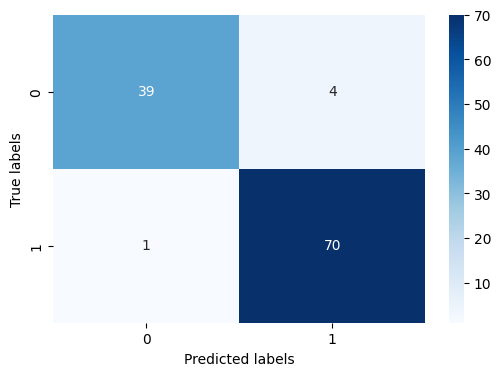

In [9]:
# Create classifier
logistic_classifier = LR(max_iter=10000)
# Fit the model
logistic_classifier.fit(Xtrain, ytrain)
# Predict and evaluate
score = logistic_classifier.score(Xtest, ytest)
print(f"Accuracy: {score}")

# Visualize the results
def visualize_results(confusion_matrix):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

y_pred = logistic_classifier.predict(Xtest)
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
visualize_results(confusion_matrix)


## 4. Parameter optimization and visualization

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 100, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized score: 0.9824561403508771


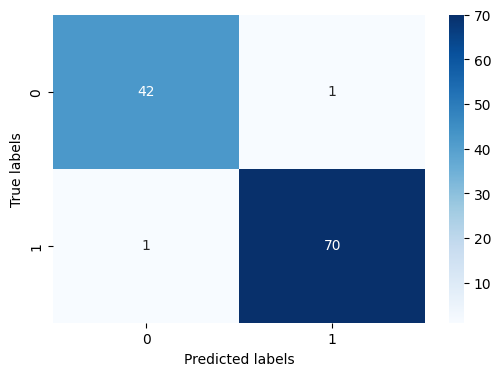

In [10]:
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # 正则化强度
    'penalty': ['l1', 'l2'],               # 正则化类型
    'solver': ['liblinear', 'saga'],       # 支持L1/L2的优化器
    'class_weight': [None, 'balanced']     # 处理类别不平衡
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=logistic_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the model with grid search
grid_search.fit(Xtrain, ytrain)

# Predict and evaluate the best model
best_model = grid_search.best_estimator_
best_score = best_model.score(Xtest, ytest)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Optimized score: {best_score}")

# Visualize the results of the best model
y_pred_best = best_model.predict(Xtest)
confusion_matrix_best = metrics.confusion_matrix(ytest, y_pred_best)
visualize_results(confusion_matrix_best)